In [37]:
%load_ext autoreload
%autoreload 2
import numpy as np
import emcee
import corner
from astropy import units as u
from scipy.optimize import root
from matplotlib import pyplot as plt


from load_mcxc_data import load_clusters
from statistics_functions import log_likelihood
from cluster_functions import funr, funr_new

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
clusters, variances=load_clusters(nrows=20)

In [4]:
T_data = [c.baryon_temp for c in clusters]

/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


2.394580869722816e-06


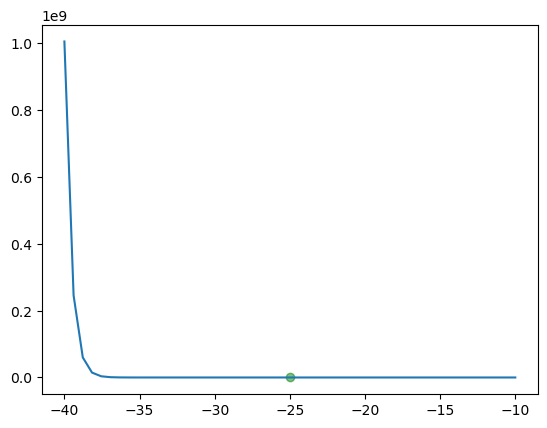

In [6]:
# for choosing a solving algorithm
from cluster_functions import funr
test_cluster=clusters[2]
x0=1e-5*u.GeV
p0s = np.linspace(-40, -10)
solns=[root(funr, x0, args=(test_cluster, [p, -4]), method='df-sane').x for p in p0s]
plt.plot(p0s, solns)
plt.scatter(-25,test_cluster.baryon_temp.value, color='green', alpha=0.5)
print(test_cluster.baryon_temp.value)

In [34]:
root(funr, x0, args=(test_cluster, [-40, -4]), method='df-sane').x

/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


array(1.00434258e+09)

In [35]:
root(funr, x0, args=(test_cluster, [-10, -4]), method='df-sane').x

array(1.37804102e-05)

In [36]:
funr(1e9, test_cluster, [-40, -4], )

<Quantity -4.12525464e+09 GeV(1/2)>

In [40]:
funr(1e-11, test_cluster, [-40, -4], )

<Quantity -3.0928841e+09 GeV(1/2)>

In [8]:
Tbs=np.logspace(-20, 5)

Text(0, 0.5, 'f(Tb)')

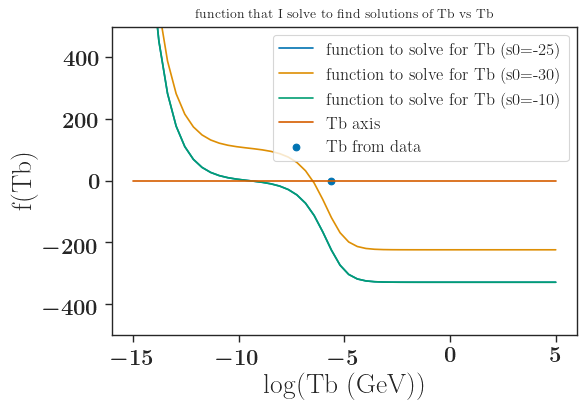

In [173]:
Tbs=np.linspace(-15, 5)
plt.plot(Tbs, funr_new(Tbs, test_cluster, [-25, -4]), label='function to solve for Tb (s0=-25)')
plt.plot(Tbs, funr_new(Tbs, test_cluster, [-30, -4]), label='function to solve for Tb (s0=-30)')
plt.plot(Tbs, funr_new(Tbs, test_cluster, [-10, -4]), label='function to solve for Tb (s0=-10)')
plt.plot(Tbs, Tbs*0, label=("Tb axis"))
plt.scatter(np.log10(test_cluster.baryon_temp.value), 0, label='Tb from data')
plt.ylim(-500, 500)
plt.title('function that I solve to find solutions of Tb vs Tb')
plt.legend()
plt.xlabel("log(Tb (GeV))")
plt.ylabel("f(Tb)")

2.394580869722816e-06


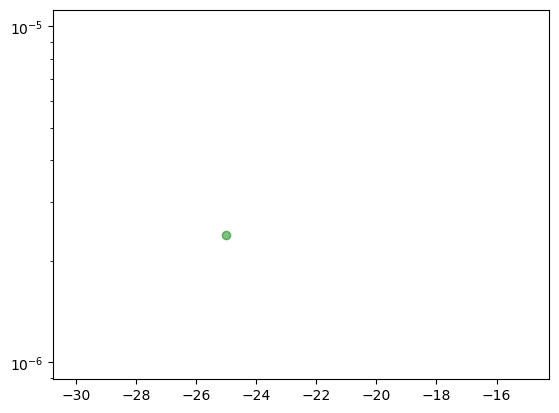

In [72]:
p0s = np.linspace(-30, -15)
solns=[root(funr_new, x0, args=(test_cluster, [p, -4]), method='df-sane').x for p in p0s]
plt.plot(p0s, solns)
plt.scatter(-25,test_cluster.baryon_temp.value, color='green', alpha=0.5)
plt.yscale('log')
print(test_cluster.baryon_temp.value)

In [74]:
from scipy.optimize import brentq
logT=brentq(funr_new, -10, 14, args=(test_cluster, [-25, -4]))
10**logT*u.GeV

<Quantity 2.96434263e-10 GeV>

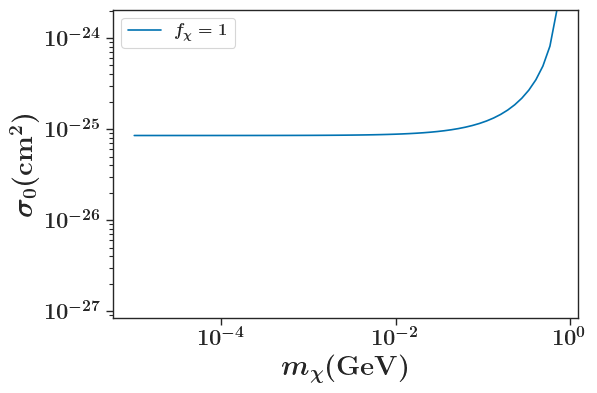

In [77]:
test_cluster.plot_sigma0_vs_m_chi()

In [155]:
p0s = np.linspace(-35, -15)
solns_bq=[brentq(funr_new, -45, 45, args=(test_cluster, [p, -4])) for p in p0s]
plt.plot(p0s, solns)
plt.scatter(-25,np.log10(test_cluster.baryon_temp.value), color='green', alpha=0.5, label='actual T_b and sigma0')
plt.title("log(T_b(GeV)) vs sigma0 using brentq solver")
plt.legend()
plt.xlabel("log(sigma0 (cm))")
plt.ylabel("log(Tb (GeV))")
print(test_cluster.baryon_temp)

ValueError: f(a) and f(b) must have different signs

/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/eleanorstuart/Desktop/krisp/thermo-idm/cluster_functions.py:77: RuntimeWarning: overflow encountered in power
  print(log_T_b)
/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/scipy/optimize/_spectral.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  sigma_k = np.vdot(s_k, s_k) / np.vdot(s_k, y_k)


2.394580869722816e-06


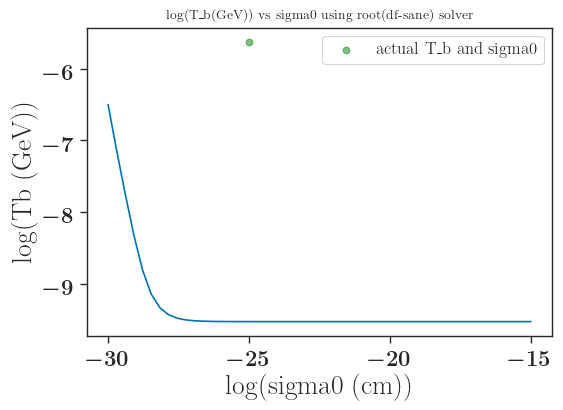

In [97]:
p0s = np.linspace(-30, -15)
solns=[root(funr_new, x0, args=(test_cluster, [p, -4]), method='df-sane').x for p in p0s]
plt.plot(p0s, solns)
plt.scatter(-25,np.log10(test_cluster.baryon_temp.value), color='green', alpha=0.5, label='actual T_b and sigma0')
plt.title("log(T_b(GeV)) vs sigma0 using root(df-sane) solver")
plt.legend()
plt.xlabel("log(sigma0 (cm))")
plt.ylabel("log(Tb (GeV))")
print(test_cluster.baryon_temp.value)

In [133]:
ndim, nwalkers = 1, 5
p0=np.zeros((nwalkers, ndim ))
log_sigma0 = np.random.uniform(low=-40, high=-15, size=nwalkers).astype(np.float128)
p0[:,0]=log_sigma0
p0

array([[-29.18372759],
       [-36.42773298],
       [-36.21445623],
       [-37.01520282],
       [-23.69083325]])

In [141]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters, 'pred_T_b_1'])

In [142]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|█████████████████████████████████████████| 100/100 [00:24<00:00,  4.07it/s]


In [143]:
sampler.run_mcmc(state, 1000, progress=True)

100%|███████████████████████████████████████| 1000/1000 [03:48<00:00,  4.37it/s]


State([[-30.        ]
 [-36.42773298]
 [-36.21445623]
 [-37.01520282]
 [-30.        ]], log_prob=[-2.67020343e+16            -inf            -inf            -inf
 -2.67020343e+16], blobs=None, random_state=('MT19937', array([1482078912, 2668332636, 2387196732, 2347282652, 4119456473,
       1880725663, 2104749735, 3959465455,  352936835, 3451135839,
        210490163, 2583640020, 1538059752, 1872234038,  967687418,
       3878516442, 3328899207,  167079404, 1432017770,  747522402,
       4209759128,  250859519, 3874787305,  636521539,  646116666,
       2587875148, 1135101953, 4032822598, 3448590254,  288855293,
       1573149357, 2345497010, 3775309121, 2328499730, 2669746212,
        348021456, 1775777122, 1837890173, 3129236728, 1137067237,
       3981620367, 4278873773, 3524629835, 3468254028, 1091871012,
       1497018774, 1584964776, 2779667781,  831881885, 2721129999,
       4081992850, 1598164552,  978469729, 2424394264, 1025878403,
        502099448, 1768108662, 1480393756, 27

In [144]:
samples = sampler.get_chain(flat=True)

In [145]:
"Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction))

'Mean acceptance fraction: 0.027'

(330, 1)


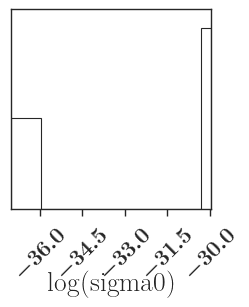

In [146]:
flat_samples = sampler.get_chain(thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples, labels=['log(sigma0)'])

In [147]:
np.median(samples)

-36.214456229863174